In [76]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [77]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [78]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


[-1.96999544  3.22899638], [-1.96802378  3.42799007]


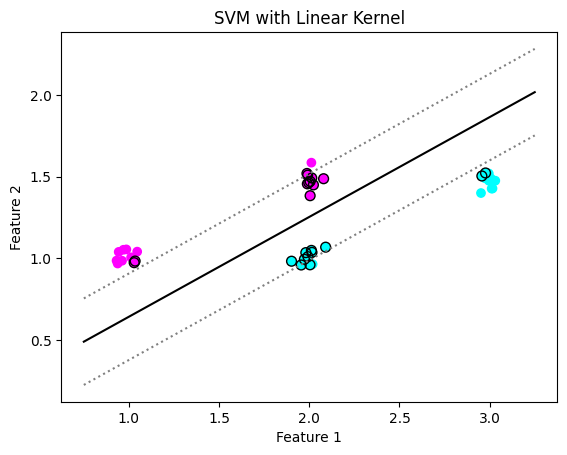

WARN - Support vector 11 with value 1.034,0.984 is ABOVE the UPPER margin 1.034,0.787
WARN - Support vector 12 with value 1.029,0.974 is ABOVE the UPPER margin 1.029,0.784
WARN - Support vector 13 with value 2.005,1.471 is ABOVE the UPPER margin 2.005,1.379
WARN - Support vector 14 with value 2.005,1.384 is ABOVE the UPPER margin 2.005,1.379
WARN - Support vector 15 with value 2.014,1.492 is ABOVE the UPPER margin 2.014,1.384
WARN - Support vector 16 with value 1.991,1.509 is ABOVE the UPPER margin 1.991,1.370
WARN - Support vector 17 with value 2.079,1.487 is ABOVE the UPPER margin 2.079,1.424
WARN - Support vector 18 with value 1.987,1.519 is ABOVE the UPPER margin 1.987,1.368
WARN - Support vector 19 with value 2.023,1.450 is ABOVE the UPPER margin 2.023,1.390
WARN - Support vector 20 with value 1.997,1.464 is ABOVE the UPPER margin 1.997,1.374
WARN - Support vector 21 with value 1.989,1.456 is ABOVE the UPPER margin 1.989,1.369


In [244]:
from sklearn import svm
import numpy as np
import numpy.matlib as matlib   
import matplotlib.pyplot as plt

# Task 1: Generating 2D Samples in Gaussian Clusters
# a) Generate 2D samples in four Gaussian clusters
#np.random.normal function generates random samples from a normal distribution with the following format
# loc: Mean (“centre”) of the distribution, tuple x,y coordinates
# scale: Standard deviation (spread or “width”) of the distribution.
# size: Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn.
# For the size 10,2 was selected because we want 10 samples of 2 dimensions x,y

cluster1 = np.random.normal(loc=[1, 1], scale=0.04, size=(10, 2)) 
cluster2 = np.random.normal(loc=[2, 1.5], scale=0.04, size= (10, 2)) 
cluster3 = np.random.normal(loc=[2, 1], scale=0.04, size= (10, 2))
cluster4 = np.random.normal(loc=[3, 1.5], scale=0.04, size= (10, 2))

# Combine clusters arrays vertically (vstack)
# Label the clusters with 1 and -1
X = np.vstack([cluster1, cluster2, cluster3, cluster4]) # 40 samples of 2 dimensions x,y
y = np.array([1]*20 + [-1]*20) # 1 for cluster1 and cluster2, -1 for cluster3 and cluster4

# b) Train a linear SVM
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X, y)


# # c) Extract Parameters and Graphical Representation
sv = svm_model.support_vectors_ # Get support vectors themselves
lagrange_multipliers = np.abs(svm_model.dual_coef_).reshape(-1) # Get lagrange multipliers constrained a > 0 (abs to remove possible -0.0)
yi = y[svm_model.support_] # Get labels of support vectors


# # Compute primal parameters
w = clf.coef_[0] # Get weights
bias = clf.intercept_ # Get intercept
m = -w[0]/w[1] # Slope of the separating line

print(f"{w}, {wi}")

# # Plotting
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='cool') 
plt.scatter(sv[:, 0], sv[:, 1], s=50, facecolors='none', edgecolors='k') # Plot support vectors
plt.title('SVM with Linear Kernel')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# # Plot separating line
xx = np.linspace(0.75, 3.25)
yy = - (w[0]*xx + bias) / w[1] # w0*x + w1*y + b = 0
# yy = m*xx - (clf.intercept_[0])/w[1]

plt.plot(xx, yy, 'k-')


# d) Check support vectors are inside or on the margin
margin = 1/np.linalg.norm(w)
yyum = yy + margin
yylm = yy - margin
plt.plot(xx, yyum, color='grey',linestyle='dotted') # upper margin
plt.plot(xx, yylm, color='grey',linestyle='dotted') # lower margin

plt.show()    

print ("The Margin is: ", margin)


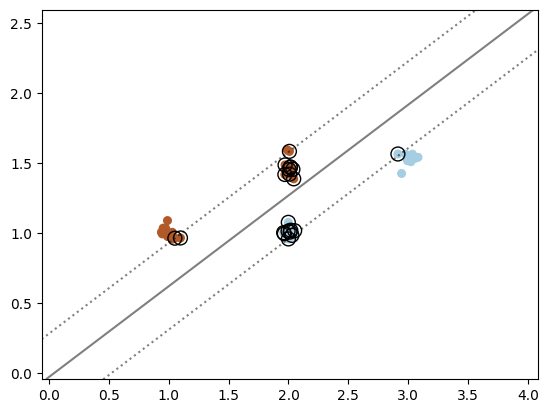

There are no support vectors outside the Margin
Margin Size = 0.260037


In [280]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np
import numpy.matlib as matlib   
import matplotlib.pyplot as plt

# Task 1: Generating 2D Samples in Gaussian Clusters
# a) Generate 2D samples in four Gaussian clusters
#np.random.normal function generates random samples from a normal distribution with the following format
# loc: Mean (“centre”) of the distribution, tuple x,y coordinates
# scale: Standard deviation (spread or “width”) of the distribution.
# size: Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn.
# For the size 10,2 was selected because we want 10 samples of 2 dimensions x,y

cluster1 = np.random.normal(loc=[1, 1], scale=0.04, size=(10, 2)) 
cluster2 = np.random.normal(loc=[2, 1.5], scale=0.04, size= (10, 2)) 
cluster3 = np.random.normal(loc=[2, 1], scale=0.04, size= (10, 2))
cluster4 = np.random.normal(loc=[3, 1.5], scale=0.04, size= (10, 2))

# Combine clusters arrays vertically (vstack)
# Label the clusters with 1 and -1
X = np.vstack([cluster1, cluster2, cluster3, cluster4]) # 40 samples of 2 dimensions x,y
y = np.array([1]*20 + [-1]*20) # 1 for cluster1 and cluster2, -1 for cluster3 and cluster4

# b) Train a linear SVM
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# # c) Extract Parameters and Graphical Representation
sv = clf.support_vectors_ # Get support vectors themselves
lagrange_multipliers = np.abs(clf.dual_coef_).reshape(-1) # Get lagrange multipliers constrained a > 0 (abs to remove possible -0.0)
yi = y[clf.support_] # Get labels of support vectors

# # Compute primal parameters   
w = clf.coef_[0] # Get weights
b = clf.intercept_ # Get intercept
a = -w[0]/w[1] # Slope of the separating line
mrg = 1/np.linalg.norm(w) # Margin


# plot the decision function
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["dotted", "-", "dotted"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
    )
plt.show()


MERR = 0
for l in range(sv[:,1].size):
    yy = a*(sv[:,0][l]) + (bias[0]/w[1]); yyuml = yy + mrg/a; yylml = yy -  mrg/a
    if sv[:,1][l] > yyuml:
        print(f"WARN - Support vector {l:.0f} with value {sv[:,0][l]:.3f},{sv[:,1][l]:.3f} is ABOVE the UPPER mrg {sv[:,0][l]:.3f},{yyuml:.3f}"); MERR += 1
    elif sv[:,1][l] < yylml:    
        print(f"WARN - Support vector {l:.0f} with value {sv[:,0][l]:.3f},{sv[:,1][l]:.3f} is BELOW the LOWER mrg {sv[:,0][l]:.3f},{yylml:.3f}"); MERR += 1
    elif l == sv[:,1].size - 1 and MERR == 0: print("There are no support vectors outside the Margin")
print(f"Margin Size = {mrg:f}")


